<a href="https://colab.research.google.com/github/RuslanDX/_Packages-/blob/main/RussianStoncks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Данные по рынку россиийских акций


In [ ]:
russian_stocks = pd.read_csv('russia.csv', index_col=0)
russian_stocks.replace('', 'Other', inplace=True)
russian_stocks.replace([np.inf, -np.inf], np.nan, inplace=True)
russian_stocks = russian_stocks.dropna()
russian_stocks = russian_stocks.replace(to_replace='None', value=0).dropna()
russian_stocks['Market Capitalization'] = pd.to_numeric(russian_stocks['Market Capitalization'])
russian_stocks['1-Year Beta'] = pd.to_numeric(russian_stocks['1-Year Beta'])
russian_stocks['Basic EPS (TTM)'] = pd.to_numeric(russian_stocks['Basic EPS (TTM)']) * 73
russian_stocks['Last'] = pd.to_numeric(russian_stocks['Last'])
russian_stocks['Total Shares Outstanding (MRQ)'] = pd.to_numeric(russian_stocks['Total Shares Outstanding (MRQ)'])
russian_stocks['Total Liabilities (MRQ)'] = pd.to_numeric(russian_stocks['Total Liabilities (MRQ)'])
russian_stocks['Total Current Assets (MRQ)'] = pd.to_numeric(russian_stocks['Total Current Assets (MRQ)'])
russian_stocks['Graham'] = (russian_stocks['Total Current Assets (MRQ)'] -  russian_stocks['Total Liabilities (MRQ)']) / russian_stocks['Total Shares Outstanding (MRQ)'] * 100
russian_stocks['P/E'] = russian_stocks['Last'] / (russian_stocks['Basic EPS (TTM)']);
russian_stocks.head(10)

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham,P/E
Ticker,,,,,,,,,,,,
GAZP,GAZPROM,297.88,1.108447e+11,Energy Minerals,0.628850,80.266716,Russian Federation,6.962800e+10,1.352401e+11,2.364450e+10,-277.494262,3.711127
ROSN,ROSNEFT OIL CO,378.35,5.701553e+10,Energy Minerals,0.696577,90.025505,Russian Federation,4.690238e+10,1.322554e+11,9.500200e+09,-898.434180,4.202698
GMKN,MMC NORILSK NICKEL,20054.00,4.652158e+10,Non-Energy Minerals,0.200623,3017.990119,Russian Federation,9.822455e+09,1.855718e+10,1.482729e+08,-5890.974882,6.644820
LKOH,OIL CO LUKOIL,4092.00,4.291400e+10,Energy Minerals,0.554844,1148.326573,Russian Federation,2.851502e+10,3.203502e+10,6.503440e+08,-541.252076,3.563446
SBER,SBERBANK OF RUSSIA,118.29,4.214113e+10,Finance,0.946130,53.111595,Russian Federation,9.167127e+10,4.732828e+11,2.247810e+10,-1697.703820,2.227197
SIBN,GAZPROM NEFT,417.40,3.104990e+10,Energy Minerals,0.485424,103.352850,Russian Federation,1.612772e+10,3.213881e+10,4.741300e+09,-337.694148,4.038592
PLZL,POLYUS,11343.00,2.482790e+10,Non-Energy Minerals,0.208485,1197.713942,Russian Federation,2.199251e+09,4.446890e+09,1.350050e+08,-1664.856119,9.470542
RUAL,UNITED COMPANY RU,59.72,1.486998e+10,Non-Energy Minerals,0.371387,15.183984,Russian Federation,8.395363e+09,1.059571e+10,1.519300e+10,-14.482653,3.933092
PHOR,PHOSAGRO,7084.00,1.439825e+10,Process Industries,0.137481,970.037379,Russian Federation,1.684810e+09,3.222147e+09,1.295000e+08,-1187.132528,7.302811


Распределение акций по показателю

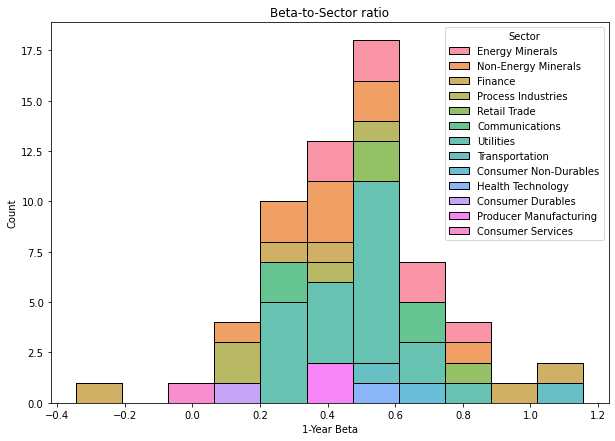

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
Beta = sns.histplot(data=russian_stocks, x="1-Year Beta", hue="Sector", multiple="stack")
title = plt.title('Beta-to-Sector ratio')

Распределение средних цен акций по секторам:

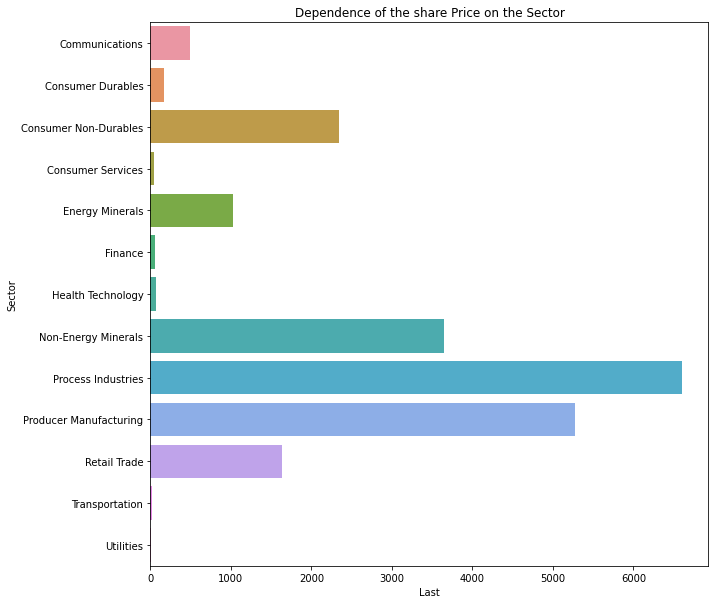

In [ ]:
plt.figure(figsize=(10, 10))
df_gb = russian_stocks.groupby('Sector').mean()[['Last']].reset_index()
g = sns.barplot(x="Last", y="Sector", data=df_gb)
t = plt.title('Dependence of the share Price on the Sector')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_corr = russian_stocks.copy()

categorial = ['Description', 'Basic EPS (TTM)', 'Sector']
df_corr[categorial] = df_corr[categorial].apply(le.fit_transform)

Коэффициенты линейной корреляции:

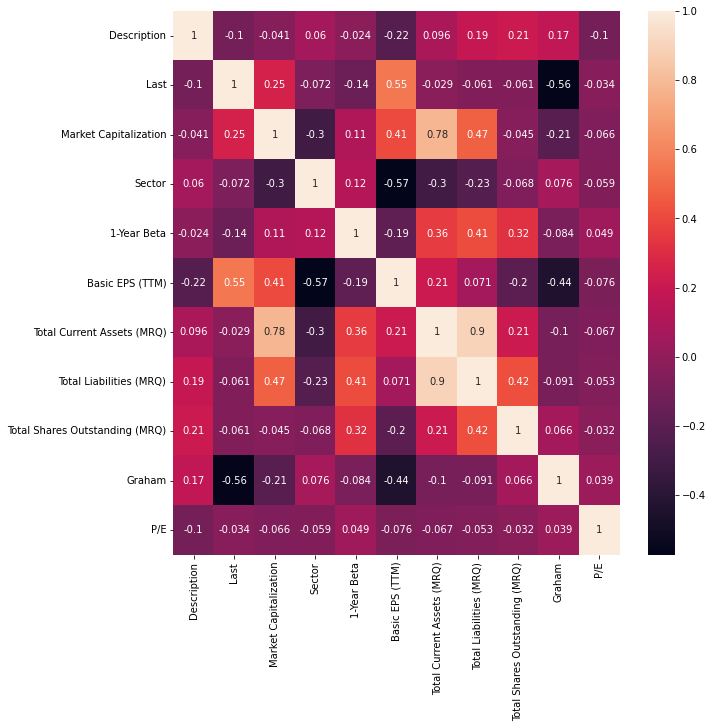

In [ ]:
plt.figure(figsize=(10, 10))
corr = df_corr.corr()

# plot the heatmap
hm = sns.heatmap(corr, 
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Распределение доли рынка по секторам экономики:

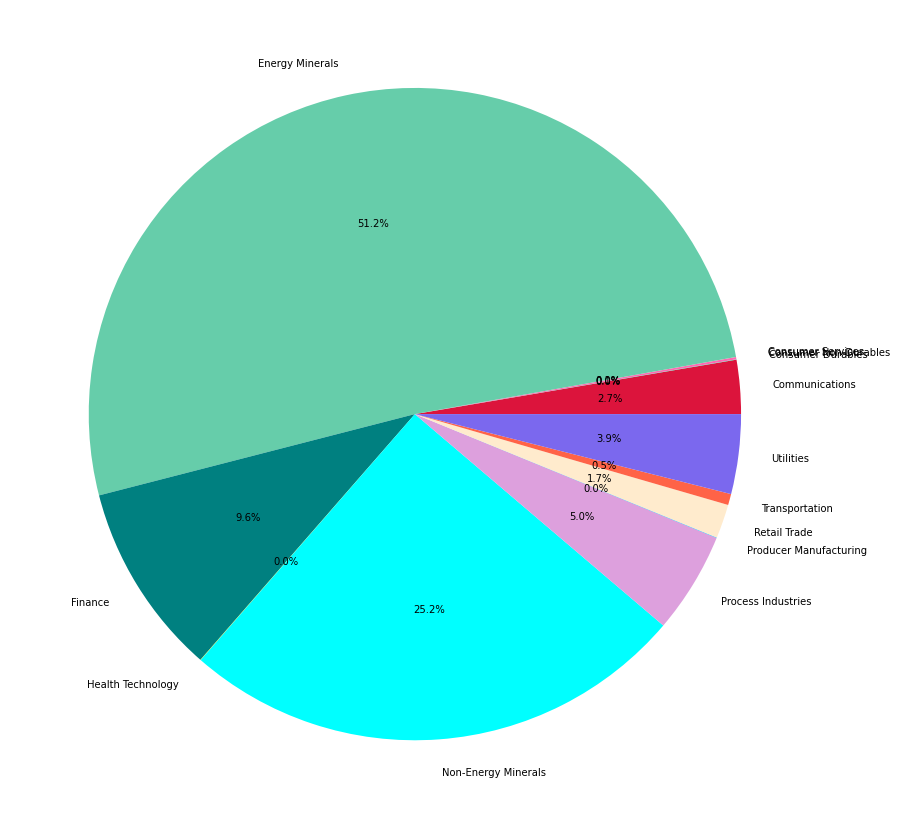

In [ ]:
colors = ['#DC143C','#00FA9A','#FF69B4','#FFA500', '#66CDAA', '#008080', '#FFD700', '#00FFFF', '#DDA0DD', '#00BFFF', '#FFEBCD', '#FF6347', '#7B68EE']
plt.figure(figsize=(15, 15))
data = russian_stocks[['Sector', 'Market Capitalization']].groupby(['Sector']).sum()
labels = russian_stocks.groupby('Sector').count().reset_index()['Sector'].to_numpy()
_ = plt.pie(data['Market Capitalization'], colors = colors, labels=labels, autopct='%.1f%%')

Распределение компаний по коэффициенту Грэма:

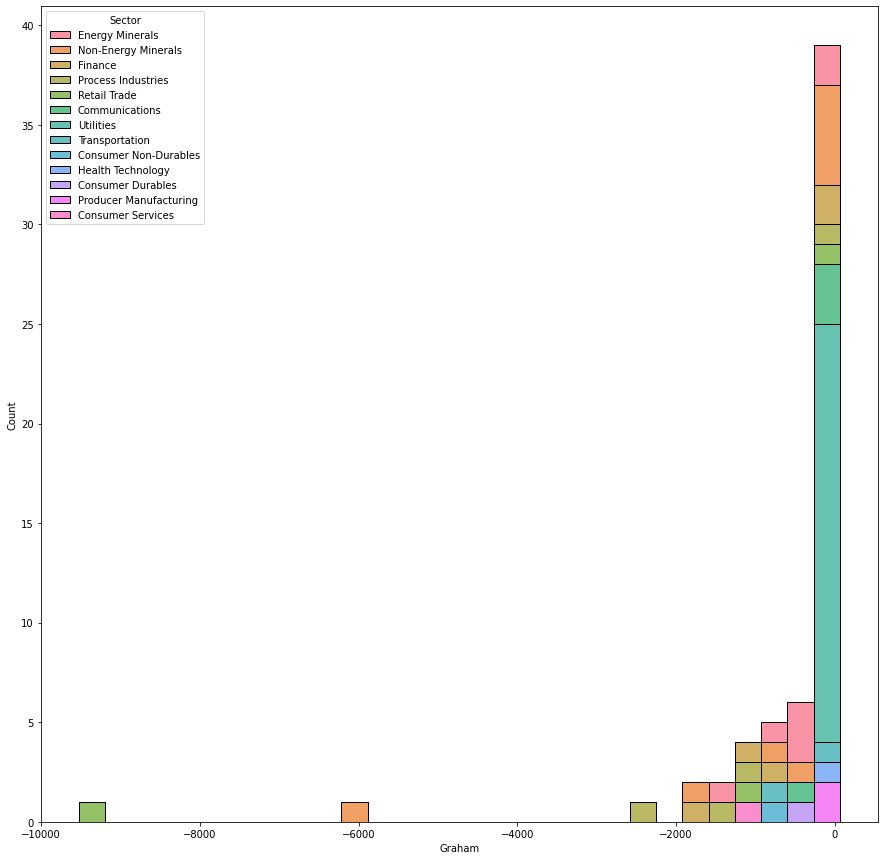

In [ ]:
russian_stocks['Graham'] = (russian_stocks['Total Current Assets (MRQ)'] -  russian_stocks['Total Liabilities (MRQ)']) / russian_stocks['Total Shares Outstanding (MRQ)'] * 100
df_22 = russian_stocks.loc[(russian_stocks['Graham'] > -10000) & (russian_stocks['Graham'] < 10000)]

plt.figure(figsize=(15, 15))
_ = sns.histplot(data=df_22, x="Graham", hue="Sector", multiple="stack")

Коэффициент <60% - бумага слишком недооценена

In [ ]:
data1 = russian_stocks.loc[(russian_stocks['Graham'] < 60)]
data1

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham,P/E
Ticker,,,,,,,,,,,,
GAZP,GAZPROM,297.88000,1.108447e+11,Energy Minerals,0.628850,80.266716,Russian Federation,6.962800e+10,1.352401e+11,2.364450e+10,-277.494262,3.711127
ROSN,ROSNEFT OIL CO,378.35000,5.701553e+10,Energy Minerals,0.696577,90.025505,Russian Federation,4.690238e+10,1.322554e+11,9.500200e+09,-898.434180,4.202698
GMKN,MMC NORILSK NICKEL,20054.00000,4.652158e+10,Non-Energy Minerals,0.200623,3017.990119,Russian Federation,9.822455e+09,1.855718e+10,1.482729e+08,-5890.974882,6.644820
LKOH,OIL CO LUKOIL,4092.00000,4.291400e+10,Energy Minerals,0.554844,1148.326573,Russian Federation,2.851502e+10,3.203502e+10,6.503440e+08,-541.252076,3.563446
SBER,SBERBANK OF RUSSIA,118.29000,4.214113e+10,Finance,0.946130,53.111595,Russian Federation,9.167127e+10,4.732828e+11,2.247810e+10,-1697.703820,2.227197
SIBN,GAZPROM NEFT,417.40000,3.104990e+10,Energy Minerals,0.485424,103.352850,Russian Federation,1.612772e+10,3.213881e+10,4.741300e+09,-337.694148,4.038592
PLZL,POLYUS,11343.00000,2.482790e+10,Non-Energy Minerals,0.208485,1197.713942,Russian Federation,2.199251e+09,4.446890e+09,1.350050e+08,-1664.856119,9.470542
RUAL,UNITED COMPANY RU,59.72000,1.486998e+10,Non-Energy Minerals,0.371387,15.183984,Russian Federation,8.395363e+09,1.059571e+10,1.519300e+10,-14.482653,3.933092
PHOR,PHOSAGRO,7084.00000,1.439825e+10,Process Industries,0.137481,970.037379,Russian Federation,1.684810e+09,3.222147e+09,1.295000e+08,-1187.132528,7.302811


Коэффициент 60-75% - бумага недооценена

In [ ]:
data2 = russian_stocks.loc[(russian_stocks['Graham'] >= 60)&(russian_stocks['Graham'] <= 75)]
data2

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham,P/E
Ticker,,,,,,,,,,,,
MGTS,MOSCOW CITY TELEPH,1630.0,2.212770e+09,Communications,0.259092,168.379718,Russian Federation,457202012.0,405178184.0,79708800.0,65.267358,9.680501



Коэффициент >75% - бумага переоценена

In [ ]:
data3 = russian_stocks.loc[(russian_stocks['Graham'] > 75)]
data3

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham,P/E
Ticker,,,,,,,,,,,,
